In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
data = pd.read_csv(r'C:\Users\psiri\Desktop\OptiCrop\Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
data.shape

(2200, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Figure size 800x400 with 0 Axes>

<Axes: >

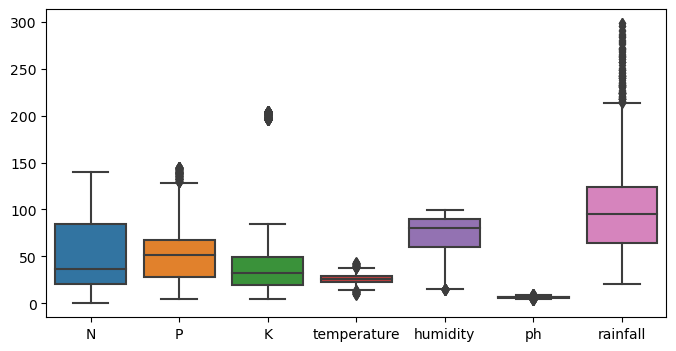

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data)

In [15]:
Q1=data['P'].quantile(0.25)
Q3=data['P'].quantile(0.75)
IQR=Q3-Q1
filter=(data['P']>=Q1-1.5*IQR) & (data['P']<=Q3+1.5*IQR)
data=data.loc[filter]

In [18]:
print("Summer crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print()
print("Winter crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print()
print("Rainy crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 50)]['label'].unique())

Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']

Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']

Rainy crops
['rice' 'papaya' 'coconut']


In [20]:
y = data['label']
x = data.drop(['label'], axis = 1)
print("Shape of x", x.shape)
print("Shape of x = y", y.shape)

Shape of x (2062, 7)
Shape of x = y (2062,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("The shape of x train", x_train.shape)
print("The shape of x test", x_test.shape)
print("The shape of y train", y_train.shape)
print("The shape of y test", y_test.shape)

The shape of x train (1649, 7)
The shape of x test (413, 7)
The shape of y train (1649,)
The shape of y test (413,)


<Axes: xlabel='N', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Nitrogen')

<Axes: xlabel='P', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Phosphorus')

<Axes: xlabel='K', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Potassium')

<Axes: xlabel='temperature', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Temperature')

<Axes: xlabel='humidity', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Humidity')

<Axes: xlabel='ph', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of pH')

<Axes: xlabel='rainfall', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Rainfall')

Text(0.5, 0.98, 'Distribution of agricultural conditions')

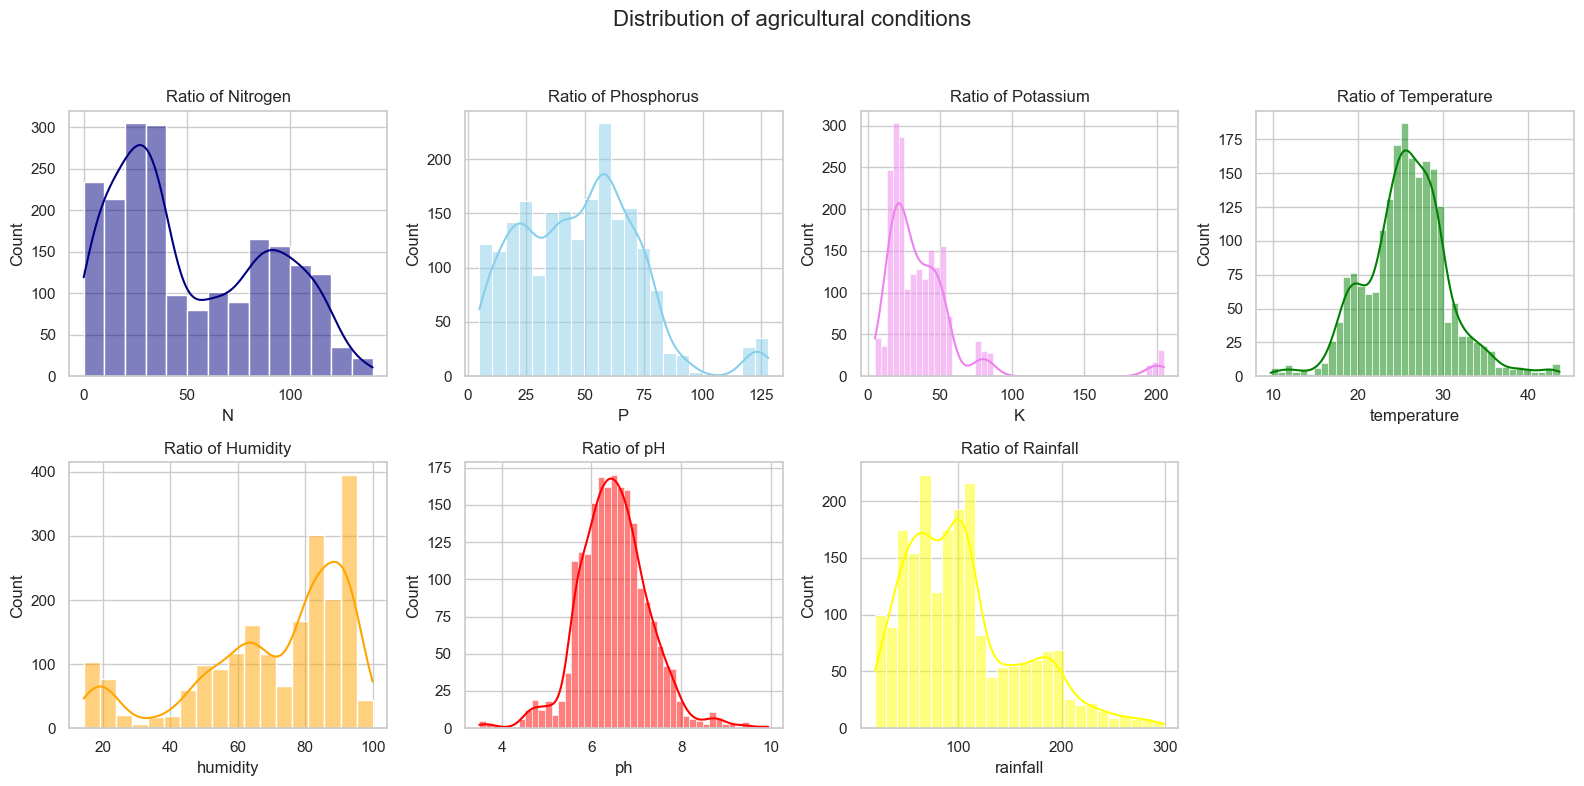

In [24]:
# 1. Univariate Analysis
# Histogram
sns.set(style="whitegrid")

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
titles = ['Ratio of Nitrogen', 'Ratio of Phosphorus', 'Ratio of Potassium',
          'Ratio of Temperature', 'Ratio of Humidity', 'Ratio of pH', 'Ratio of Rainfall']
colors = ['navy', 'skyblue', 'violet', 'green', 'orange', 'red', 'yellow']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])

fig.delaxes(axes[-1])

plt.suptitle("Distribution of agricultural conditions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Axes: >

<Axes: xlabel='humidity', ylabel='label'>

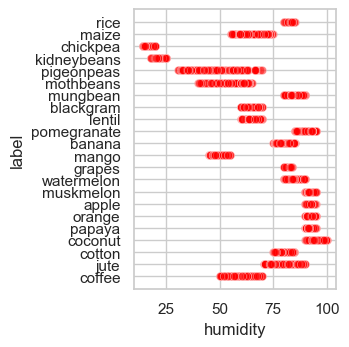

In [25]:
# 2. Bivariate Analysis
# Scatter Plot
plt.subplot(2, 4, 7)
sns.scatterplot(x=data['humidity'], y=data['label'],alpha = 0.5, c = 'red', edgecolors = 'black')

Text(0.5, 1.02, 'Pair Plot of Crop Features')

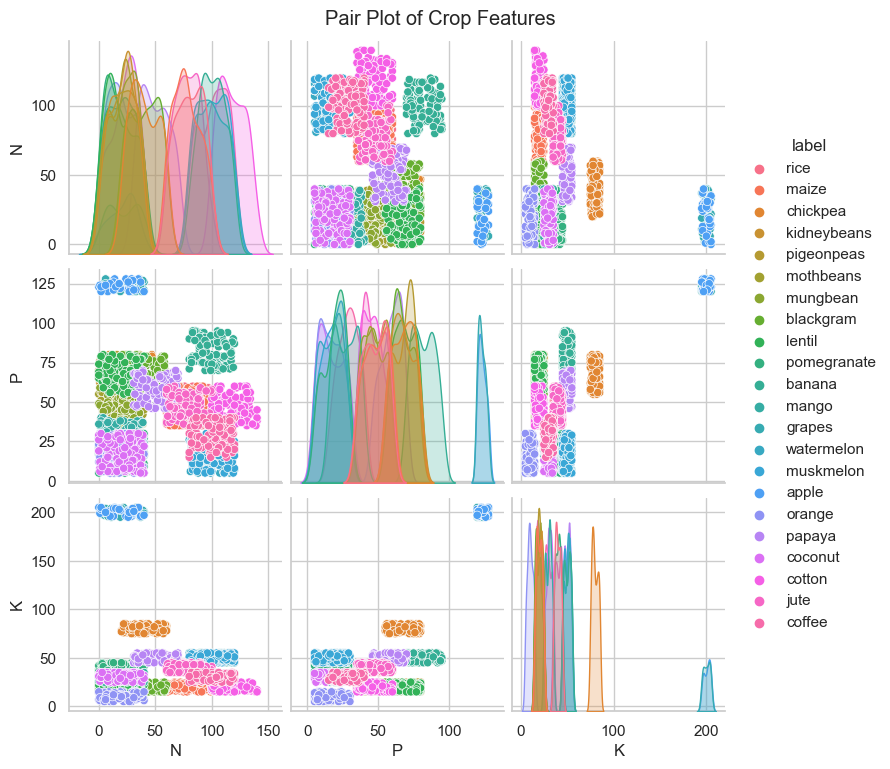

In [26]:
# 3. Multivariate Analysis
# Pair Plot
features = ['N', 'P', 'K', 'label']
sns.pairplot(data[features], hue = 'label')
plt.suptitle("Pair Plot of Crop Features", y = 1.02)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Crop Features')

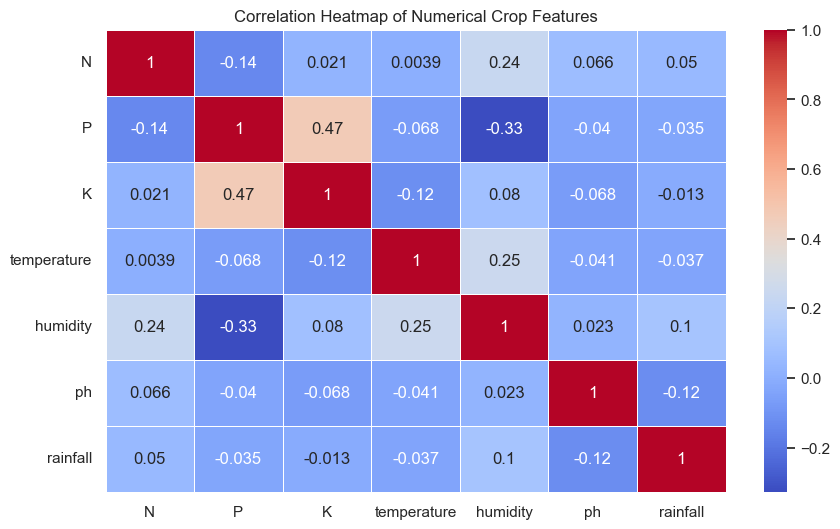

In [27]:
# Heat Map
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Crop Features")
plt.show()

<Axes: ylabel='count'>

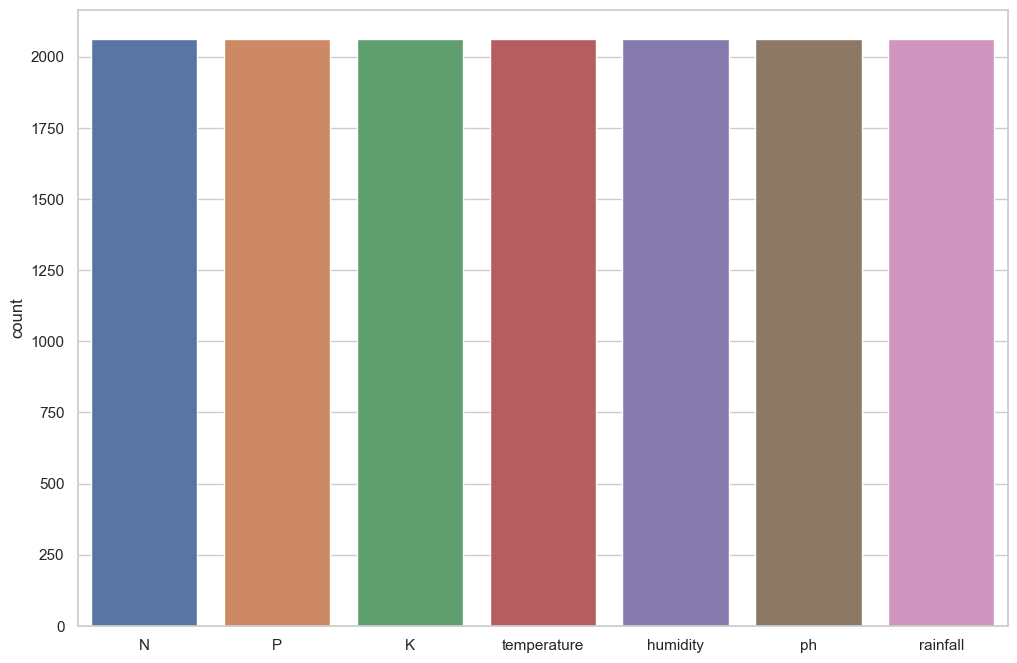

In [28]:
# Count Plot
sns.countplot(data)

In [29]:
# 4. Descriptive Analysis
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000
mean,52.440349,47.706596,37.996605,25.770363,70.433297,6.502347,104.286486
std,37.246143,25.479349,33.049629,4.885812,22.569963,0.785073,56.385635
min,0.000000,5.000000,5.000000,9.724458,14.258040,3.504752,20.211267
25%,22.000000,27.000000,20.000000,23.080864,58.469697,6.016597,62.940621
50%,39.000000,48.000000,30.000000,25.768297,79.175605,6.469677,94.772563
75%,87.000000,64.000000,46.000000,28.614586,89.130631,6.956328,132.787974
max,140.000000,128.000000,205.000000,43.675493,99.981876,9.935091,298.560117


KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'No of clusters')

Text(0, 0.5, 'WCSS')

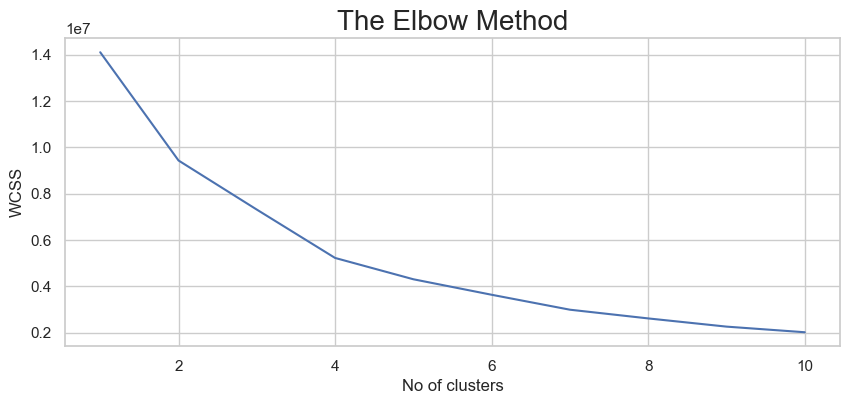

In [32]:
# 1. K-Means
plt.rcParams['figure.figsize'] = (10, 4)
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)  # x should be your selected feature set
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
km = KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

print("lets check the results after applying the K-Means clustering analysis \n")
print("Crops in First cluster:",z[z['cluster']==0]['label'].unique())
print()
print("Crops in Second cluster:",z[z['cluster']==1]['label'].unique())
print()
print("Crops in Third cluster:",z[z['cluster']==2]['label'].unique())
print()
print("Crops in Fourth cluster:",z[z['cluster']==3]['label'].unique())

lets check the results after applying the K-Means clustering analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'muskmelon' 'apple' nan
 'orange' 'papaya']

Crops in Second cluster: ['rice' 'pigeonpeas' 'apple' nan 'orange' 'papaya' 'coconut' 'cotton'
 'jute']

Crops in Third cluster: ['maize' 'banana' nan 'grapes' 'watermelon' 'muskmelon' 'orange' 'papaya'
 'coconut' 'cotton' 'jute']

Crops in Fourth cluster: [nan 'grapes' 'muskmelon']


In [34]:
# 2. Logistic Regression Model
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\psiri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<Axes: >

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

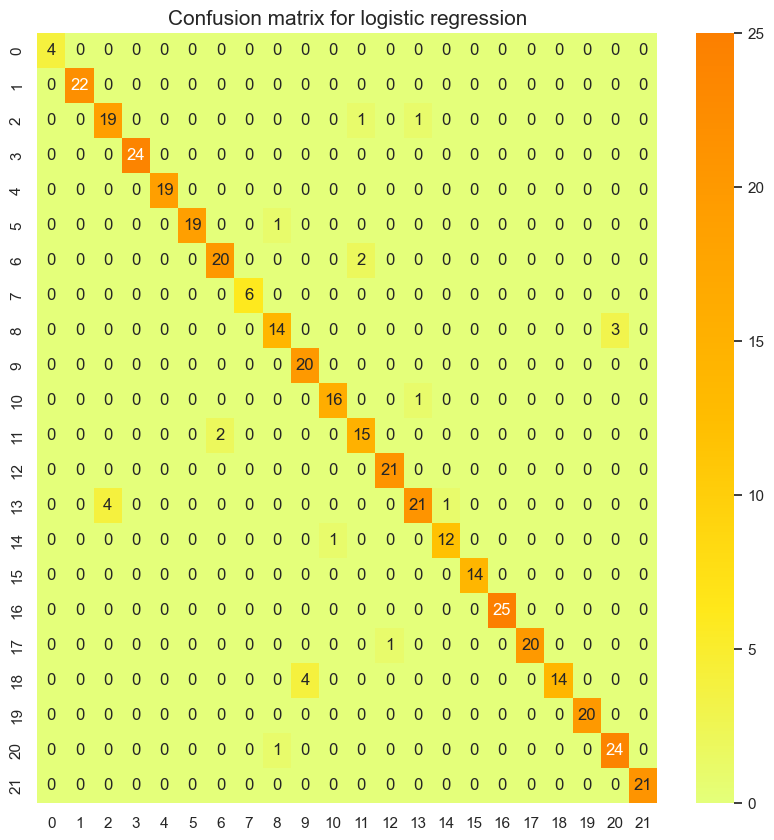

In [35]:
# 3. Evaluating the performance of the model and saving the model
plt.rcParams["figure.figsize"] = (10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = 'Wistia')
plt.title("Confusion matrix for logistic regression", fontsize = 15)
plt.show()

In [36]:
# 4. Predict the best crop according to the given parameters
prediction = model.predict((np.array([[105,35,40,25,64,7,160]])))
print("The suggested crop for given climatic condition is: ",prediction)

The suggested crop for given climatic condition is:  ['coffee']


C:\Users\psiri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
import pickle
pickle.dump(model, open(r'C:\Users\psiri\Desktop\OptiCrop\model.pkl', 'wb'))